In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
BLS_data_2017 = pd.read_csv("BLS_data_2017.csv")
BLS_data_2018 = pd.read_csv("BLS_data_2018.csv")
set_2017_df = BLS_data_2017[["area_title","naics_title","occ_code"," a_median ","h_median","tot_emp","naics","o_group","own_code"]]
set_2018_df = BLS_data_2018[["area_title","naics_title","occ_code","a_median","h_median","tot_emp","naics","o_group","own_code"]]

In [4]:
set_2017_df=set_2017_df.loc[set_2017_df['o_group'] == 'total']
set_2018_df=set_2018_df.loc[set_2018_df['o_group'] == 'total']

In [5]:
set_2017_df=set_2017_df.loc[set_2017_df['area_title'] == 'U.S.']
set_2018_df=set_2018_df.loc[set_2018_df['area_title'] == 'U.S.']

In [6]:
combined_data = pd.merge(set_2017_df, set_2018_df, on="occ_code", suffixes=('_2017', '_2018'), how='inner')

In [7]:
combined_data["tot_emp_2018"] = combined_data["tot_emp_2018"].str.replace(',', '')  #remove comma in numbers
combined_data["tot_emp_2017"] = combined_data["tot_emp_2017"].str.replace(',', '')  #remove comma in numbers

In [8]:
combined_data["tot_emp_2018"] = combined_data["tot_emp_2018"].str.replace('*', '0')  #remove comma in numbers
combined_data["tot_emp_2017"] = combined_data["tot_emp_2017"].str.replace('*', '0')  #remove comma in numbers

In [9]:
# checkfortext_df = combined_data.loc[combined_data['tot_emp_2018'].str.isdigit(), 'tot_emp_2018']
# checkfortext_df

In [10]:
combined_data["difference"] = combined_data["tot_emp_2018"].astype(float) - combined_data["tot_emp_2017"].astype(float)

In [11]:
combined_data["Percentage"] = round(100*combined_data["difference"].astype(float)/combined_data["tot_emp_2017"].astype(float),2).astype(float)

In [12]:
# checkfortext_df = combined_data.loc[~combined_data['Percentage'].str.isdigit(),'Percentage']
# checkfortext_df

In [13]:
combined_data=combined_data.loc[combined_data['naics_title_2017'] == combined_data['naics_title_2018']]
combined_data=combined_data.loc[combined_data['naics_2017'] == combined_data['naics_2018']]
combined_data=combined_data.loc[combined_data['own_code_2017'] == combined_data['own_code_2018']]
combined_data.head()

,area_title_2017,naics_title_2017,occ_code,a_median,h_median_2017,tot_emp_2017,naics_2017,o_group_2017,own_code_2017,area_title_2018,naics_title_2018,a_median,h_median_2018,tot_emp_2018,naics_2018,o_group_2018,own_code_2018,difference,Percentage
5321,U.S.,Management of Companies and Enterprises,00-0000,"66,680",32.06,2326030,55,total,5,U.S.,Management of Companies and Enterprises,"69,020",33.18,2372520,55,total,5,46490.0,2.00
5780,U.S.,Administrative and Support and Waste Managemen...,00-0000,"29,710",14.28,9108260,56,total,5,U.S.,Administrative and Support and Waste Managemen...,"30,860",14.84,9265630,56,total,5,157370.0,1.73
6255,U.S.,Educational Services,00-0000,"47,600",22.88,13042580,61,total,235,U.S.,Educational Services,"48,840",23.48,13149990,61,total,235,107410.0,0.82
6740,U.S.,Health Care and Social Assistance,00-0000,"37,780",18.16,20208050,62,total,58,U.S.,Health Care and Social Assistance,"38,610",18.56,20621190,62,total,58,413140.0,2.04
7240,U.S.,"Arts, Entertainment, and Recreation",00-0000,"26,340",12.66,2370160,71,total,57,U.S.,"Arts, Entertainment, and Recreation","27,440",13.19,2422590,71,total,57,52430.0,2.21


In [14]:
combined_data["Percentage"]=combined_data["Percentage"].astype(float)
combined_data.head()

,area_title_2017,naics_title_2017,occ_code,a_median,h_median_2017,tot_emp_2017,naics_2017,o_group_2017,own_code_2017,area_title_2018,naics_title_2018,a_median,h_median_2018,tot_emp_2018,naics_2018,o_group_2018,own_code_2018,difference,Percentage
5321,U.S.,Management of Companies and Enterprises,00-0000,"66,680",32.06,2326030,55,total,5,U.S.,Management of Companies and Enterprises,"69,020",33.18,2372520,55,total,5,46490.0,2.00
5780,U.S.,Administrative and Support and Waste Managemen...,00-0000,"29,710",14.28,9108260,56,total,5,U.S.,Administrative and Support and Waste Managemen...,"30,860",14.84,9265630,56,total,5,157370.0,1.73
6255,U.S.,Educational Services,00-0000,"47,600",22.88,13042580,61,total,235,U.S.,Educational Services,"48,840",23.48,13149990,61,total,235,107410.0,0.82
6740,U.S.,Health Care and Social Assistance,00-0000,"37,780",18.16,20208050,62,total,58,U.S.,Health Care and Social Assistance,"38,610",18.56,20621190,62,total,58,413140.0,2.04
7240,U.S.,"Arts, Entertainment, and Recreation",00-0000,"26,340",12.66,2370160,71,total,57,U.S.,"Arts, Entertainment, and Recreation","27,440",13.19,2422590,71,total,57,52430.0,2.21


In [15]:
combined_data=combined_data.sort_values(by='Percentage',ascending=False)
combined_data.head()

,area_title_2017,naics_title_2017,occ_code,a_median,h_median_2017,tot_emp_2017,naics_2017,o_group_2017,own_code_2017,area_title_2018,naics_title_2018,a_median,h_median_2018,tot_emp_2018,naics_2018,o_group_2018,own_code_2018,difference,Percentage
204448,U.S.,"Merchant Wholesalers, Nondurable Goods (4242 a...",00-0000,"47,200",22.69,329000,4240A2,total,5,U.S.,"Merchant Wholesalers, Nondurable Goods (4242 a...","48,770",23.45,374540,4240A2,total,5,45540.0,13.84
159963,U.S.,Offices of Mental Health Practitioners (except...,00-0000,"44,390",21.34,89460,621330,total,5,U.S.,Offices of Mental Health Practitioners (except...,"46,480",22.35,99160,621330,total,5,9700.0,10.84
178701,U.S.,"Promoters of Performing Arts, Sports, and Simi...",00-0000,"29,970",14.41,140310,711300,total,5,U.S.,"Promoters of Performing Arts, Sports, and Simi...","30,990",14.90,150630,711300,total,5,10320.0,7.36
175044,U.S.,Services for the Elderly and Persons with Disa...,00-0000,"23,910",11.49,1689870,624120,total,5,U.S.,Services for the Elderly and Persons with Disa...,"24,680",11.87,1804260,624120,total,5,114390.0,6.77
143966,U.S.,Remediation and Other Waste Management Services,00-0000,"40,540",19.49,141130,562900,total,5,U.S.,Remediation and Other Waste Management Services,"41,550",19.98,149980,562900,total,5,8850.0,6.27


In [16]:
combined_data=combined_data.loc[combined_data['Percentage'] <= 100000000]
combined_data.head(50)

,area_title_2017,naics_title_2017,occ_code,a_median,h_median_2017,tot_emp_2017,naics_2017,o_group_2017,own_code_2017,area_title_2018,naics_title_2018,a_median,h_median_2018,tot_emp_2018,naics_2018,o_group_2018,own_code_2018,difference,Percentage
204448,U.S.,"Merchant Wholesalers, Nondurable Goods (4242 a...",00-0000,"47,200",22.69,329000,4240A2,total,5,U.S.,"Merchant Wholesalers, Nondurable Goods (4242 a...","48,770",23.45,374540,4240A2,total,5,45540.0,13.84
159963,U.S.,Offices of Mental Health Practitioners (except...,00-0000,"44,390",21.34,89460,621330,total,5,U.S.,Offices of Mental Health Practitioners (except...,"46,480",22.35,99160,621330,total,5,9700.0,10.84
178701,U.S.,"Promoters of Performing Arts, Sports, and Simi...",00-0000,"29,970",14.41,140310,711300,total,5,U.S.,"Promoters of Performing Arts, Sports, and Simi...","30,990",14.90,150630,711300,total,5,10320.0,7.36
175044,U.S.,Services for the Elderly and Persons with Disa...,00-0000,"23,910",11.49,1689870,624120,total,5,U.S.,Services for the Elderly and Persons with Disa...,"24,680",11.87,1804260,624120,total,5,114390.0,6.77
143966,U.S.,Remediation and Other Waste Management Services,00-0000,"40,540",19.49,141130,562900,total,5,U.S.,Remediation and Other Waste Management Services,"41,550",19.98,149980,562900,total,5,8850.0,6.27
164076,U.S.,All Other Ambulatory Health Care Services,00-0000,"42,410",20.39,126890,621990,total,5,U.S.,All Other Ambulatory Health Care Services,"43,470",20.90,134580,621990,total,5,7690.0,6.06
203534,U.S.,"Merchant Wholesalers, Durable Goods (4232, 423...",00-0000,"41,480",19.94,1325890,4230A1,total,5,U.S.,"Merchant Wholesalers, Durable Goods (4232, 423...","42,810",20.58,1399380,4230A1,total,5,73490.0,5.54
174587,U.S.,Individual and Family Services,00-0000,"25,130",12.08,2303960,624100,total,5,U.S.,Individual and Family Services,"26,210",12.60,2430640,624100,total,5,126680.0,5.50
177787,U.S.,Theater Companies and Dinner Theaters,00-0000,"35,540",17.09,69190,711110,total,5,U.S.,Theater Companies and Dinner Theaters,"36,630",17.61,72690,711110,total,5,3500.0,5.06
140310,U.S.,Security Systems Services,00-0000,"43,450",20.89,139020,561620,total,5,U.S.,Security Systems Services,"44,420",21.35,145820,561620,total,5,6800.0,4.89


In [17]:
combined_data=combined_data.loc[combined_data['tot_emp_2017'].astype(float) >= 1000]
combined_data=combined_data.loc[combined_data['tot_emp_2018'].astype(float) >= 1000]

In [18]:
combined_data.head(50)

,area_title_2017,naics_title_2017,occ_code,a_median,h_median_2017,tot_emp_2017,naics_2017,o_group_2017,own_code_2017,area_title_2018,naics_title_2018,a_median,h_median_2018,tot_emp_2018,naics_2018,o_group_2018,own_code_2018,difference,Percentage
204448,U.S.,"Merchant Wholesalers, Nondurable Goods (4242 a...",00-0000,"47,200",22.69,329000,4240A2,total,5,U.S.,"Merchant Wholesalers, Nondurable Goods (4242 a...","48,770",23.45,374540,4240A2,total,5,45540.0,13.84
159963,U.S.,Offices of Mental Health Practitioners (except...,00-0000,"44,390",21.34,89460,621330,total,5,U.S.,Offices of Mental Health Practitioners (except...,"46,480",22.35,99160,621330,total,5,9700.0,10.84
178701,U.S.,"Promoters of Performing Arts, Sports, and Simi...",00-0000,"29,970",14.41,140310,711300,total,5,U.S.,"Promoters of Performing Arts, Sports, and Simi...","30,990",14.90,150630,711300,total,5,10320.0,7.36
175044,U.S.,Services for the Elderly and Persons with Disa...,00-0000,"23,910",11.49,1689870,624120,total,5,U.S.,Services for the Elderly and Persons with Disa...,"24,680",11.87,1804260,624120,total,5,114390.0,6.77
143966,U.S.,Remediation and Other Waste Management Services,00-0000,"40,540",19.49,141130,562900,total,5,U.S.,Remediation and Other Waste Management Services,"41,550",19.98,149980,562900,total,5,8850.0,6.27
164076,U.S.,All Other Ambulatory Health Care Services,00-0000,"42,410",20.39,126890,621990,total,5,U.S.,All Other Ambulatory Health Care Services,"43,470",20.90,134580,621990,total,5,7690.0,6.06
203534,U.S.,"Merchant Wholesalers, Durable Goods (4232, 423...",00-0000,"41,480",19.94,1325890,4230A1,total,5,U.S.,"Merchant Wholesalers, Durable Goods (4232, 423...","42,810",20.58,1399380,4230A1,total,5,73490.0,5.54
174587,U.S.,Individual and Family Services,00-0000,"25,130",12.08,2303960,624100,total,5,U.S.,Individual and Family Services,"26,210",12.60,2430640,624100,total,5,126680.0,5.50
177787,U.S.,Theater Companies and Dinner Theaters,00-0000,"35,540",17.09,69190,711110,total,5,U.S.,Theater Companies and Dinner Theaters,"36,630",17.61,72690,711110,total,5,3500.0,5.06
140310,U.S.,Security Systems Services,00-0000,"43,450",20.89,139020,561620,total,5,U.S.,Security Systems Services,"44,420",21.35,145820,561620,total,5,6800.0,4.89


In [20]:
combined_data["a_median_2018"] = combined_data["a_median"].str.replace(',', '')  #remove comma in numbers
combined_data["a_median_2017"] = combined_data[" a_median "].str.replace(',', '')  #remove comma in numbers

In [21]:
combined_data["a_median_2018"] = combined_data["a_median_2018"].str.replace('*', '0')  #remove comma in numbers
combined_data["a_median_2017"] = combined_data["a_median_2017"].str.replace('*', '0')  #remove comma in numbers

In [22]:
combined_data["a_median_2018"] = combined_data["a_median_2018"].str.replace('#', '0')  #remove comma in numbers
combined_data["a_median_2017"] = combined_data["a_median_2017"].str.replace('#', '0')  #remove comma in numbers

In [32]:
combined_data["pay_difference"] = combined_data["a_median_2018"].astype(float) - combined_data["a_median_2017"].astype(float)

In [33]:
combined_data["PayDifferencePercentage"] = round(100*combined_data["pay_difference"].astype(float)/combined_data["a_median_2017"].astype(float),2).astype(float)
combined_data.head(50)

,area_title_2017,naics_title_2017,occ_code,a_median,h_median_2017,tot_emp_2017,naics_2017,o_group_2017,own_code_2017,area_title_2018,...,tot_emp_2018,naics_2018,o_group_2018,own_code_2018,difference,Percentage,a_median_2018,a_median_2017,pay_difference,PayDifferencePercentage
204448,U.S.,"Merchant Wholesalers, Nondurable Goods (4242 a...",00-0000,"47,200",22.69,329000,4240A2,total,5,U.S.,...,374540,4240A2,total,5,45540.0,13.84,48770,47200,1570.0,3.33
159963,U.S.,Offices of Mental Health Practitioners (except...,00-0000,"44,390",21.34,89460,621330,total,5,U.S.,...,99160,621330,total,5,9700.0,10.84,46480,44390,2090.0,4.71
178701,U.S.,"Promoters of Performing Arts, Sports, and Simi...",00-0000,"29,970",14.41,140310,711300,total,5,U.S.,...,150630,711300,total,5,10320.0,7.36,30990,29970,1020.0,3.40
175044,U.S.,Services for the Elderly and Persons with Disa...,00-0000,"23,910",11.49,1689870,624120,total,5,U.S.,...,1804260,624120,total,5,114390.0,6.77,24680,23910,770.0,3.22
143966,U.S.,Remediation and Other Waste Management Services,00-0000,"40,540",19.49,141130,562900,total,5,U.S.,...,149980,562900,total,5,8850.0,6.27,41550,40540,1010.0,2.49
164076,U.S.,All Other Ambulatory Health Care Services,00-0000,"42,410",20.39,126890,621990,total,5,U.S.,...,134580,621990,total,5,7690.0,6.06,43470,42410,1060.0,2.50
203534,U.S.,"Merchant Wholesalers, Durable Goods (4232, 423...",00-0000,"41,480",19.94,1325890,4230A1,total,5,U.S.,...,1399380,4230A1,total,5,73490.0,5.54,42810,41480,1330.0,3.21
174587,U.S.,Individual and Family Services,00-0000,"25,130",12.08,2303960,624100,total,5,U.S.,...,2430640,624100,total,5,126680.0,5.50,26210,25130,1080.0,4.30
177787,U.S.,Theater Companies and Dinner Theaters,00-0000,"35,540",17.09,69190,711110,total,5,U.S.,...,72690,711110,total,5,3500.0,5.06,36630,35540,1090.0,3.07
140310,U.S.,Security Systems Services,00-0000,"43,450",20.89,139020,561620,total,5,U.S.,...,145820,561620,total,5,6800.0,4.89,44420,43450,970.0,2.23


In [25]:
# combined_data.sort_values[by='PayDifferencePercentage'].head(50)

In [ ]:
hello = combined_data.plot.scatter(x='Percentage', y='PayDifferencePercentage')

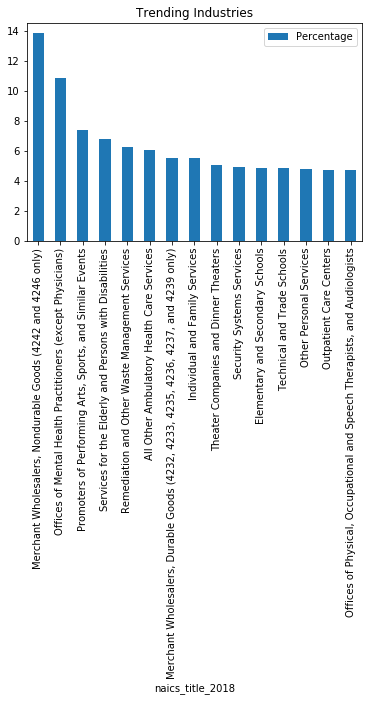

In [34]:
trimmed = combined_data.head(15)
trimmed_graph = trimmed.plot.bar(x='naics_title_2018', y='Percentage')
plt.title("Trending Industries")
plt.tight_layout()
plt.savefig('growth_industries')

In [35]:
trimmed[['naics_title_2018', 'Percentage', 'a_median_2018','PayDifferencePercentage']]

,naics_title_2018,Percentage,a_median_2018,PayDifferencePercentage
204448,"Merchant Wholesalers, Nondurable Goods (4242 a...",13.84,48770,3.33
159963,Offices of Mental Health Practitioners (except...,10.84,46480,4.71
178701,"Promoters of Performing Arts, Sports, and Simi...",7.36,30990,3.40
175044,Services for the Elderly and Persons with Disa...,6.77,24680,3.22
143966,Remediation and Other Waste Management Services,6.27,41550,2.49
164076,All Other Ambulatory Health Care Services,6.06,43470,2.50
203534,"Merchant Wholesalers, Durable Goods (4232, 423...",5.54,42810,3.21
174587,Individual and Family Services,5.50,26210,4.30
177787,Theater Companies and Dinner Theaters,5.06,36630,3.07
140310,Security Systems Services,4.89,44420,2.23
